# Lecture 2

## basics of R programming

In [6]:
x<-rnorm(15)
x

[1]  0.35156317 -1.36695924  1.07700760 -1.87646844  0.80588245 -0.13486170
 [7] -1.40795852  0.23082333  0.03177919 -0.48500750  0.23381262 -1.07251048
[13] -0.79687342  0.70405076  0.09203068

In [12]:
# split values into positive and negative
posv<-vector()
negv<-vector()

for(i in 1:length(x)){
    if (x[i]>0) posv<-c(posv,x[i])
    if (x[i]<=0) negv<-c(negv,x[i])
}
posv
negv

[1] 0.35156317 1.07700760 0.80588245 0.23082333 0.03177919 0.23381262 0.70405076
[8] 0.09203068

[1] -1.3669592 -1.8764684 -0.1348617 -1.4079585 -0.4850075 -1.0725105 -0.7968734

In [15]:
# change the code to use if else
posv<-vector()
negv<-vector()

for(i in 1:length(x)){
    if (x[i]>0) {
        posv<-c(posv,x[i])
    }else{
        negv<-c(negv,x[i])
    }
}
posv
negv

[1] 0.35156317 1.07700760 0.80588245 0.23082333 0.03177919 0.23381262 0.70405076
[8] 0.09203068

[1] -1.3669592 -1.8764684 -0.1348617 -1.4079585 -0.4850075 -1.0725105 -0.7968734

In [18]:
x[which(x>0)]
x[x>0]

[1] 0.35156317 1.07700760 0.80588245 0.23082333 0.03177919 0.23381262 0.70405076
[8] 0.09203068

[1] 0.35156317 1.07700760 0.80588245 0.23082333 0.03177919 0.23381262 0.70405076
[8] 0.09203068

In [24]:
# calculate the variance of a list of numbers
# $ V = \frac{1}{n-1}\sum (x_i - \frac{1}{n}\sumx_i)^2$
x = rnorm(10)
n = length(x)
m = 0
for (i in 1:n){
    m = m+x[i]
}
m = m/n
m
ss=0
for (i in 1:n){
    s = (x[i]-m)^2
    ss = ss + s
}
ss/(n-1)
#or simply:
sum((x-mean(x))^2)/(n-1)
var(x)

[1] -0.231769

[1] 0.3663238

[1] 0.3663238

[1] 0.3663238

# ELISA analysis

In [26]:
getwd()
setwd('./datasets/ELISAdata/')

[1] "C:/Users/t.paixao/Documents/IGC"

In [27]:
require(xlsx)

Loading required package: xlsx


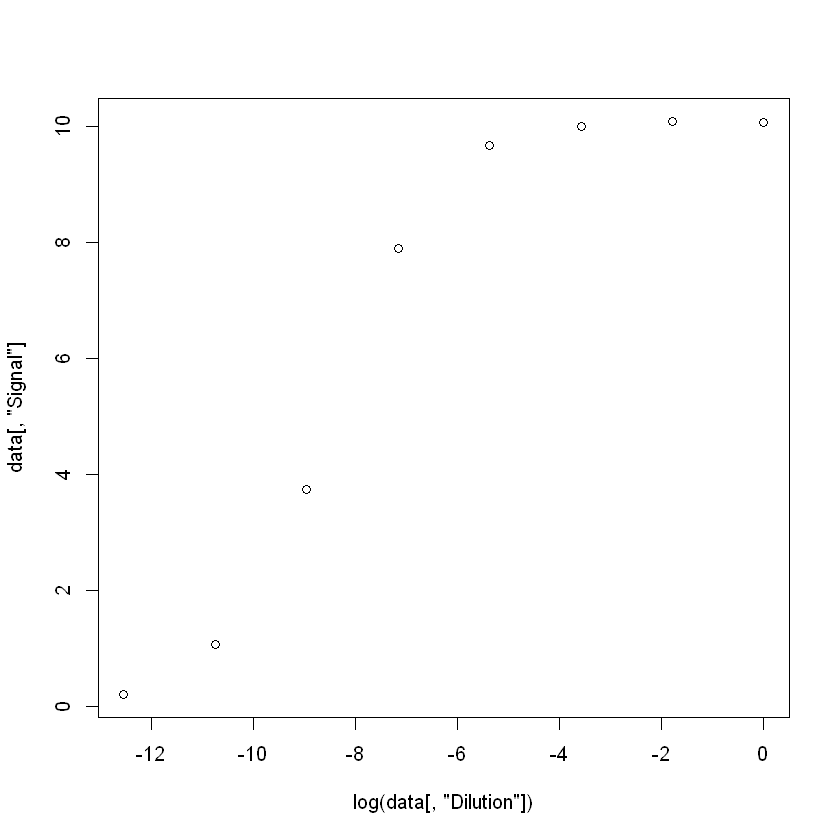

In [35]:
data = read.xlsx('201903/elisa_20190316.xlsx',1)
plot(log(data[,"Dilution"]),data[,"Signal"])

In [63]:
help(remove)

In [122]:
dfs = vector()

folders = dir()

for (folder in folders){
    print(folder)
    files = dir(folder)
    for (file in files){
        df = read.xlsx(paste(folder,file,sep='/'),1)
        df[,"date"]=substr(file,7,14)
        dfs = rbind(dfs,df)
    }
}

[1] "201903"
[1] "201904"
[1] "201905"
[1] "201906"


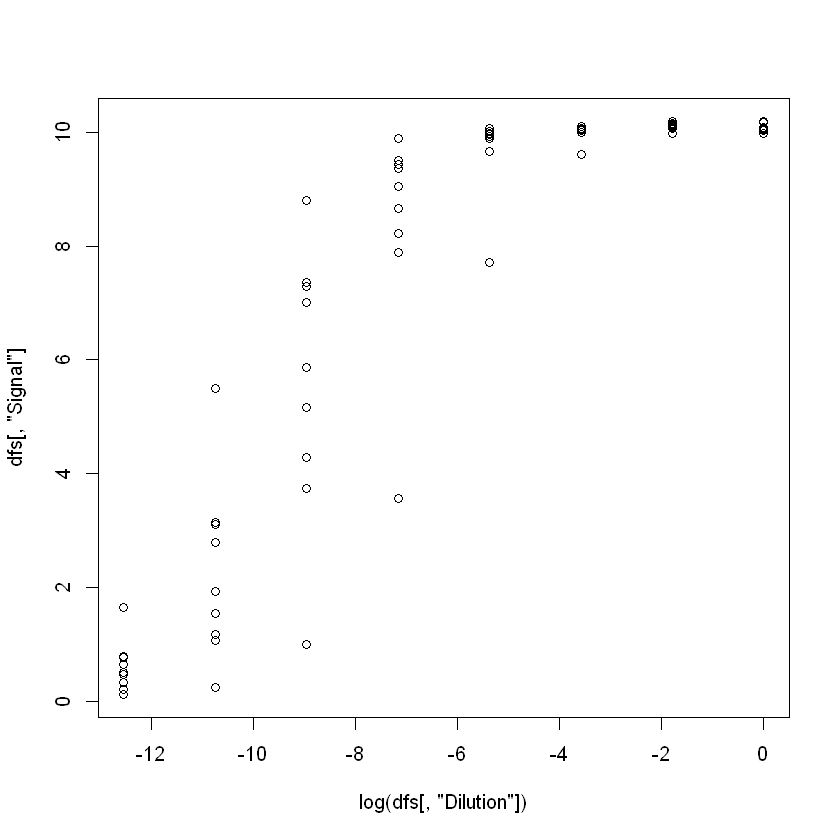

In [123]:
plot(log(dfs[,"Dilution"]),dfs[,"Signal"])

In [124]:
mod <- nls(Signal ~ k2*Dilution/(k1+Dilution),start=list(k1=.5,k2=10),data = dfs)

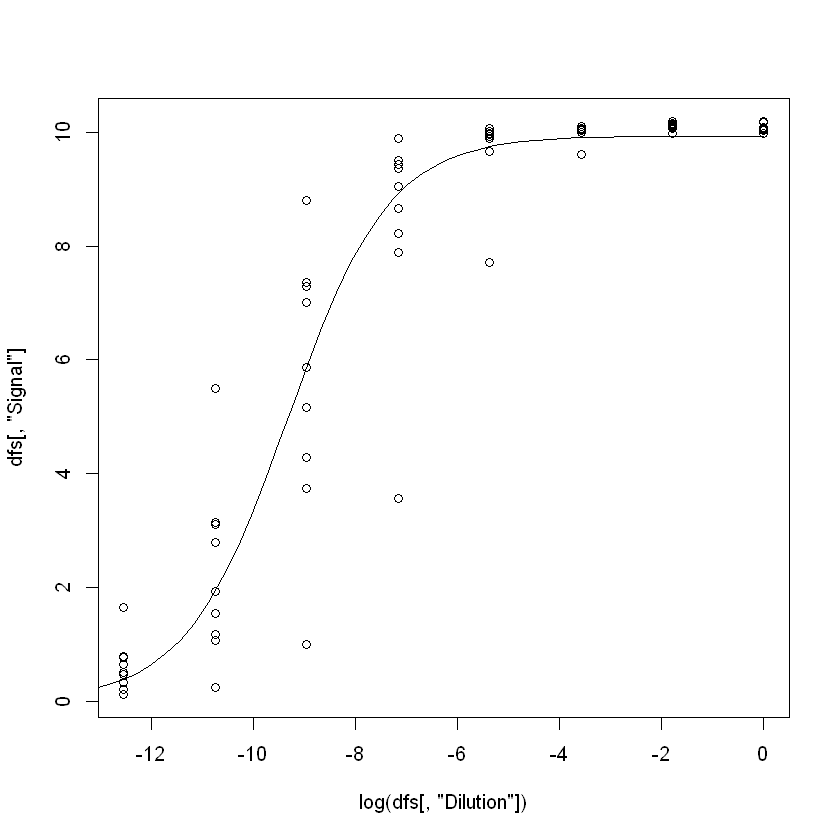

In [125]:
xx = exp(seq(log(1e-12), log(1), length.out = 100))
myx = data.frame(Dilution = c(xx))

preds = predict(mod,myx)

plot(log(dfs[,"Dilution"]),dfs[,"Signal"])
lines(log(xx),preds)

In [120]:
lseq()

ERROR: Error in lseq(): konnte Funktion "lseq" nicht finden


In [98]:
length(preds)
length(xx)

[1] 80

[1] 1001